# **TensorFlow and Convolutional Neural Network**

> 1) GPU

> 2) Handwritten digits recognition using TensorFlow and CNN

> 3) Text mining using CNN: 

      3.1.   Pre-processing
      3.2.   Embedded Word
      3.3.   Model Training




















**GPU using Google Colab**

_Hardware Accelerator: GPU_
_Python version: 3_


In [4]:
from tensorflow.python.client import device_lib
print("Show System RAM Memory:\n\n")
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:




Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7440573163474723422
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2058187342317199674
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17869839355788304991
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7561450417479076364
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


## **Google drive and Colab**

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load the dataset

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/train/', target_size = (50, 50), batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## MNIST using CNN

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras import optimizers
from keras import backend as K

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


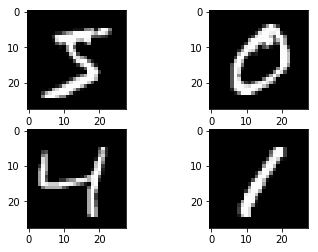

In [10]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

**Pre-processing**

In [0]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]


# normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/ 255

# one hot encode outputs
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

**Model**

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Loss and Accuracy**

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1556 - acc: 0.9516 - val_loss: 0.0358 - val_acc: 0.9892
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0410 - acc: 0.9872 - val_loss: 0.0265 - val_acc: 0.9906
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0274 - acc: 0.9911 - val_loss: 0.0270 - val_acc: 0.9909
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0213 - acc: 0.9932 - val_loss: 0.0401 - val_acc: 0.9888
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0180 - acc: 0.9941 - val_loss: 0.0244 - val_acc: 0.9923
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0147 - acc: 0.9954 - val_loss: 0.0191 - val_acc: 0.9941
Epoch 7/10
60000/60000 [======

## Cat Dog Classification using CNN

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/train/', target_size = (50, 50), 
                                                 batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/test/', target_size = (50, 50),
                                            batch_size = 32, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


### Building the model

In [0]:
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the model

In [17]:
model.fit_generator(training_set,  steps_per_epoch = 8000,  epochs = 25,  validation_steps = 2000)

Epoch 1/25
8000/8000 [==============================] - 1722s 215ms/step - loss: 0.1591 - acc: 0.9289
Epoch 2/25
8000/8000 [==============================] - 949s 119ms/step - loss: 0.0163 - acc: 0.9946
Epoch 3/25
8000/8000 [==============================] - 948s 119ms/step - loss: 0.0120 - acc: 0.9961
Epoch 4/25
8000/8000 [==============================] - 950s 119ms/step - loss: 0.0083 - acc: 0.9975
Epoch 5/25
8000/8000 [==============================] - 924s 115ms/step - loss: 0.0081 - acc: 0.9976
Epoch 6/25
8000/8000 [==============================] - 926s 116ms/step - loss: 0.0071 - acc: 0.9979
Epoch 7/25
8000/8000 [==============================] - 928s 116ms/step - loss: 0.0061 - acc: 0.9982
Epoch 8/25
8000/8000 [==============================] - 923s 115ms/step - loss: 0.0060 - acc: 0.9985
Epoch 9/25
8000/8000 [==============================] - 910s 114ms/step - loss: 0.0047 - acc: 0.9988
Epoch 10/25
8000/8000 [==============================] - 903s 113ms/step - loss: 0.0048 - 

KeyboardInterrupt: ignored

### Testing the model

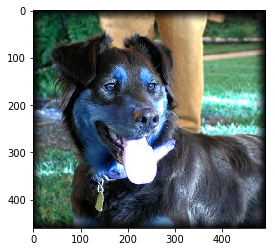

This is a dog


In [18]:
import cv2
# 1 is dog and 0 is cat
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/test/190.jpg')
plt.imshow(img) 
plt.show()  # display it
img = cv2.resize(img,(50,50))
img = img.reshape(1,50,50,3)
if (model.predict(img).item()):
  print ("This is a dog")
else:
  print ("This is a cat")

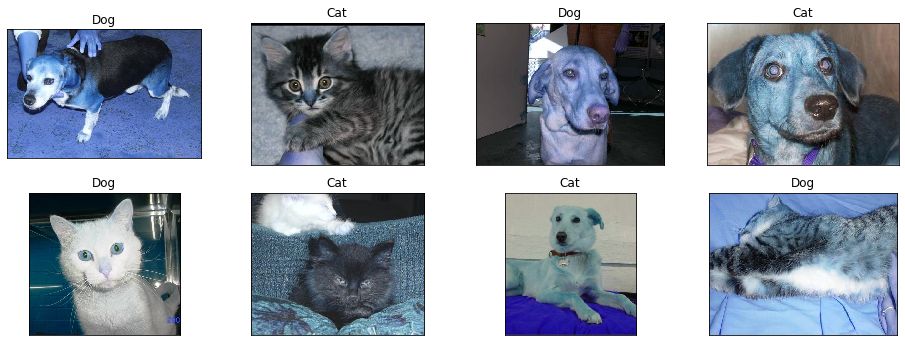

In [19]:
fig=plt.figure(figsize=(16, 12))
num=0

for i in range(201,209):
    y = fig.add_subplot(4, 4, num+1)
    img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/test/'+str(i)+".jpg")
    y.imshow(img) 
    #plt.show()  # display it
    img = cv2.resize(img,(50,50))
    img = img.reshape(1,50,50,3)
    if (model.predict(img).item()):
      pred = "Dog"
    else:
      pred = "Cat"
    
    plt.title(pred)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    num = num+1
    
  
    
plt.show()

**Q1) The speed is certainly faster with the use of GPU compared to CPU**

## GPU vs CPU

**Run time on CPU for the following code: 2151.60 seconds**

**Run time using GPU: 61.25 seconds**

In [20]:
import time
start = time.time()
!python3 '/content/gdrive/My Drive/Colab Notebooks/mnist_cnn.py'
end = time.time()
print('\n')
print(str(end - start) + 'seconds')

Using TensorFlow backend.
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
2019-09-23 02:37:05.423551: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2019-09-23 02:37:05.427456: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000155000 Hz
2019-09-23 02:37:05.427757: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1a8f2c0 executing computations on platform Host. Devices:
2019-09-23 02:37:05.427786: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-09-23 02:37:05.429670: I tensorflow/stream_execut

## MIST in TensorFlow using CNN

In [33]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True) 
batch_size = 128 
import matplotlib.pyplot as plt 
import random as ran 
import numpy as np 
# Functions that can define the size of train and test sets 
train_X = mnist.train.images.reshape(-1, 28, 28, 1) 
test_X = mnist.test.images.reshape(-1,28,28,1)

train_y = mnist.train.labels
test_y = mnist.test.labels

x = tf.placeholder("float", [None, 28,28,1]) 
y = tf.placeholder("float", [None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
def conv2d(x, W, b, strides=1): 
  # Conv2D wrapper, with bias and relu activation 
  x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME') 
  x = tf.nn.bias_add(x, b)
  return tf.nn.relu(x) 
 
def maxpool2d(x, k=2): 
  return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [0]:
weights = { 
      'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
      'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
      'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
      'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
      'out': tf.get_variable('W6', shape=(128,10), initializer=tf.contrib.layers.xavier_initializer()), } 

biases = { 
      'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()), 
      'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()), 
      'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()), 
      'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()), 
      'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()), }

In [0]:
def conv_net(x, weights, biases): 
  # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1. 
  conv1 = conv2d(x, weights['wc1'], biases['bc1']) 
  # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix. 
  conv1 = maxpool2d(conv1, k=2) 
  # Convolution Layer 
  # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2. 
  conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) 
  # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix. 
  conv2 = maxpool2d(conv2, k=2) 
  
  conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
  
  # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4. 
  conv3 = maxpool2d(conv3, k=2) 
  # Fully connected layer 
  # Reshape conv2 output to fit fully connected layer input 
  fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]]) 
  fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1']) 
  fc1 = tf.nn.relu(fc1) 
  # Output, class prediction 
  # finally we multiply the fully connected layer with the weights and add a bias term. 
  out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) 
  return out


In [51]:
learning_rate = 0.001 

pred = conv_net(x, weights, biases) 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 

#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector. 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) 
#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init = tf.global_variables_initializer() 
epochs = 50 
with tf.Session() as sess: 
  sess.run(init) 
  train_loss = [] 
  test_loss = [] 
  train_accuracy = [] 
  test_accuracy = [] 
  summary_writer = tf.summary.FileWriter('./Output', sess.graph)
  
  for i in range(epochs): 
    for batch in range(len(train_X)//batch_size): 
      batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))] 
      batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))] 
      # Run optimization op (backprop). 
      # Calculate batch loss and accuracy 
      opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y}) 
      loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y}) 
      print("Iter " + str(i) + ", Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
  print("Optimization Finished!") 
  # Calculate accuracy for all 10000 mnist test images 
  test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y}) 
  train_loss.append(loss) 
  test_loss.append(valid_loss) 
  train_accuracy.append(acc) 
  test_accuracy.append(test_acc) 
  print("Testing Accuracy:","{:.5f}".format(test_acc))
  summary_writer.close()

Iter 0, Loss= 2.287428, Training Accuracy= 0.10938
Iter 0, Loss= 2.286336, Training Accuracy= 0.12500
Iter 0, Loss= 2.265810, Training Accuracy= 0.14844
Iter 0, Loss= 2.264065, Training Accuracy= 0.10938
Iter 0, Loss= 2.254582, Training Accuracy= 0.14062
Iter 0, Loss= 2.227091, Training Accuracy= 0.27344
Iter 0, Loss= 2.222953, Training Accuracy= 0.33594
Iter 0, Loss= 2.188220, Training Accuracy= 0.50000
Iter 0, Loss= 2.129883, Training Accuracy= 0.49219
Iter 0, Loss= 2.147435, Training Accuracy= 0.43750
Iter 0, Loss= 2.103298, Training Accuracy= 0.45312
Iter 0, Loss= 2.034709, Training Accuracy= 0.55469
Iter 0, Loss= 1.944859, Training Accuracy= 0.57812
Iter 0, Loss= 1.914445, Training Accuracy= 0.52344
Iter 0, Loss= 1.926565, Training Accuracy= 0.41406
Iter 0, Loss= 1.737256, Training Accuracy= 0.50000
Iter 0, Loss= 1.733726, Training Accuracy= 0.50000
Iter 0, Loss= 1.689015, Training Accuracy= 0.57812
Iter 0, Loss= 1.606390, Training Accuracy= 0.70312
Iter 0, Loss= 1.480295, Trainin

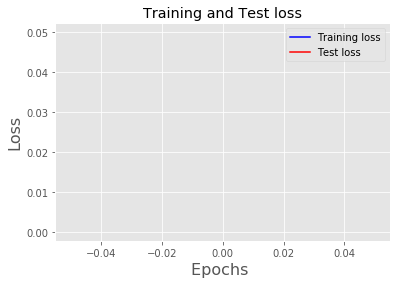

<Figure size 432x288 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss') 
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss') 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Loss',fontsize=16) 
plt.legend() 
plt.figure() 
plt.show()

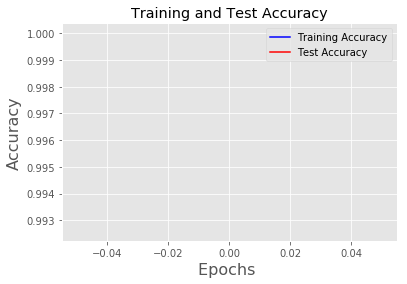

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy') 
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy') 
plt.title('Training and Test Accuracy') 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.legend() 
plt.figure()
plt.show()

**Q3) Although the model is not well fitted, the training loss and accuracy quickly reach plateau. This means we have way too many units in our layer. We can use dropout to avoid overfitting and increase speed.**

## Text Mining using CNN

### Pre-processing

In [21]:
import pandas as pd

filepath_dict = {'yelp': '/content/gdrive/My Drive/Colab Notebooks/yelp_labelled.txt',
                 'amazon': '/content/gdrive/My Drive/Colab Notebooks/amazon_cells_labelled.txt', 
                 'imdb': '/content/gdrive/My Drive/Colab Notebooks/imdb_labelled.txt'}

df_list = [] 
for source, filepath in filepath_dict.items(): 
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t') 
  df['source'] = source
  df_list.append(df) 


df = pd.concat(df_list)

print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


**Feature Vector, CountVectorizer**

In [22]:
sentences = ['John likes ice cream', 'John hates chocolate.']

from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [23]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [24]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.796


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Using DNN

In [26]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]

model = Sequential() 

model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=10)

print('\n')
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

print("Testing Accuracy: {:.4f}".format(accuracy))

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 742us/step - loss: 0.6869 - acc: 0.5587 - val_loss: 0.6707 - val_acc: 0.6600
Epoch 2/100
750/750 [==============================] - 0s 384us/step - loss: 0.6303 - acc: 0.7720 - val_loss: 0.6274 - val_acc: 0.6800
Epoch 3/100
750/750 [==============================] - 0s 396us/step - loss: 0.5341 - acc: 0.8693 - val_loss: 0.5707 - val_acc: 0.7360
Epoch 4/100
750/750 [==============================] - 0s 357us/step - loss: 0.4224 - acc: 0.9200 - val_loss: 0.5229 - val_acc: 0.7640
Epoch 5/100
750/750 [==============================] - 0s 352us/step - loss: 0.3309 - acc: 0.9507 - val_loss: 0.4851 - val_acc: 0.7600
Epoch 6/100
750/750 [==============================] - 0s 376us/step - loss: 0.2611 - acc: 0.9653 - val_loss: 0.4626 - val_acc: 0.7920
Epoch 7/100
750/750 [==============================] - 0s 347us/step - loss: 0.2101 - acc: 0.9787 - val_loss: 0.4441 - val_acc: 0.7920
Epoch 8/1

### Learnign Curves

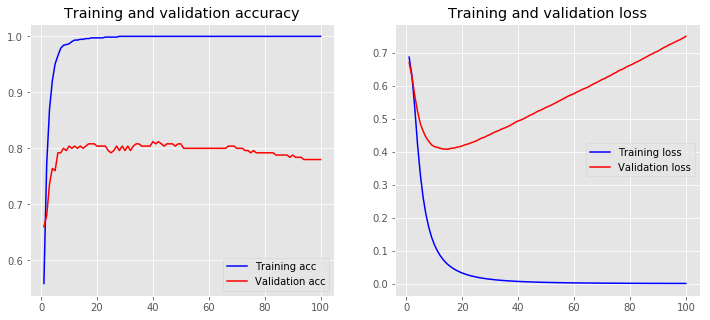

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

def plot_history(history): 
    acc = history.history['acc'] 
    val_acc = history.history['val_acc'] 
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    
plot_history(history)

**Q4) In this case, the training accuracy is way higher than validation accuracy. However, training loss is way lower than validation loss. This means the model does not fit well on unseen data or the data is too small to train. We can add dropout layers to effective avoid this problem.**

### Embedded Word

**Pre-processing**

In [28]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

print(sentences_train[2])
print('\n')
print(X_train[2])

Of all the dishes, the salmon was the best, but all were great.


[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]


In [29]:
for word in ['the', 'all', 'happy', 'sad']:  print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 43
happy: 320
sad: 450


In [30]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100 # Pad variables with zeros

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[  1  10   3 282 739  25   8 208  30  64 459 230  13   1 124   5 231   8
  58   5  67   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


### Model Training

In [31]:
from keras.models import Sequential 
from keras import layers 

embedding_dim = 50 

model = Sequential() 

model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dense(10, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


**Model evaluation**

Training Accuracy: 1.0000
Testing Accuracy: 0.8160


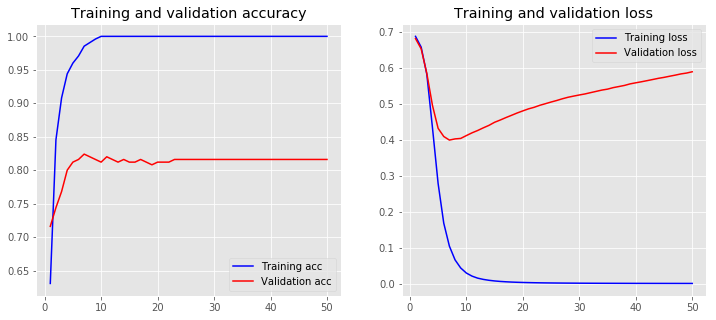

In [32]:
history = model.fit(X_train, y_train, epochs=50, verbose=False, validation_data=(X_test, y_test), batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False) 

print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy: {:.4f}".format(accuracy)) 
plot_history(history)

**Q5) In this case, the model is still over fitted. In addition, the accuracy and loss quickly plateaus out right after epoch 10. This is much quicker than previous model.**

**Q6) We can reduce the number of epochs and check if the difference between training and testing loss/accuracy is smaller and that accuracy is higher. We can consider random smapling training data to be more representative of testing data. We also need to make sure, the class balance is maintained similar in both the training and testing set.**